In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from minian import utilities

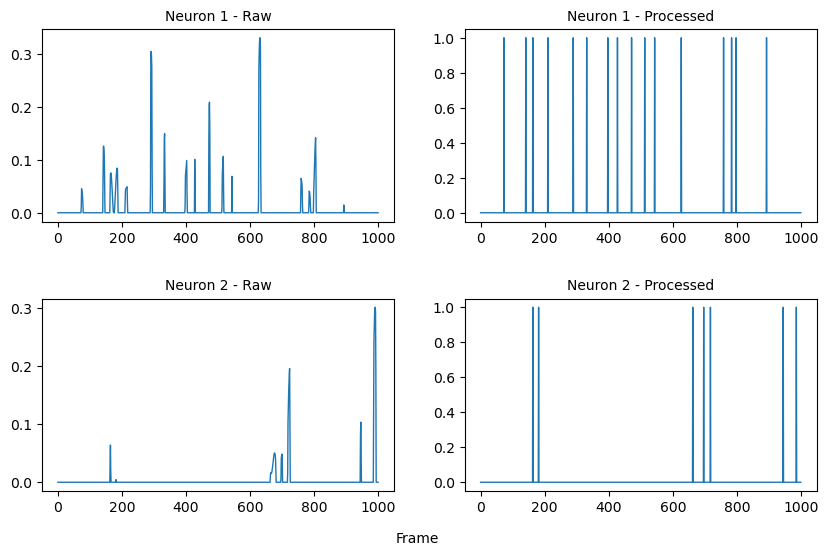

In [32]:
#Plot and save a comparison of extracted spike trains before and after 

def preprocess_spike_data(spike_trains):
    '''
    Function for preprocessing the raw spike train data
    Removes spike residues by setting consecutive non-leading values to 0 and normalizes all non-zero values to 1
    Input is 2d numpy array
    Output is 2d numpy array
    '''
    
    for i in range(np.size(spike_trains, axis=0)):
        for j in range(np.size(spike_trains[i], axis=0) -1, 0, -1):
            if spike_trains[i][j] != 0 and spike_trains[i][j-1] != 0:
                spike_trains[i][j] = 0
            if spike_trains[i][j] != 0 and spike_trains[i][j-1] == 0:
                spike_trains[i][j] = 1
        if spike_trains[i][0] != 0:
            spike_trains[i][0] = 1
    return spike_trains

dpath = "/hpc/mzhu843/image-processing/minian/results/experiment5/vars"

minian_ds = utilities.open_minian(dpath)
raw_spikes_data = minian_ds['S'].values
processed_spikes_data = preprocess_spike_data(np.copy(raw_spikes_data))

# Create a 2x2 plot
fig, axs = plt.subplots(2, 2, figsize=(10, 6), gridspec_kw={'hspace': 0.4})

axs[0, 0].plot(raw_spikes_data[0][0:1000], linewidth=1)
axs[0, 0].set_title('Neuron 1 - Raw', fontsize=10)

axs[1, 0].plot(raw_spikes_data[1][3000:4000], linewidth=1)
axs[1, 0].set_title('Neuron 2 - Raw', fontsize=10)

axs[0, 1].plot(processed_spikes_data[0][0:1000], linewidth=1)
axs[0, 1].set_title('Neuron 1 - Processed', fontsize=10)

axs[1, 1].plot(processed_spikes_data[1][3000:4000], linewidth=1)
axs[1, 1].set_title('Neuron 2 - Processed', fontsize=10)

fig.text(0.5, 0.03, 'Frame', ha='center', va='center')

# Display the plot
plt.savefig('/hpc/mzhu843/image-processing/minian/visualisations/experiment5/postprocessing/before and after postprocessing')

